# No. 1

In [ ]:
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import pandas as pd

Train (60000, 28, 28) (60000,)
Test (10000, 28, 28) (10000,)


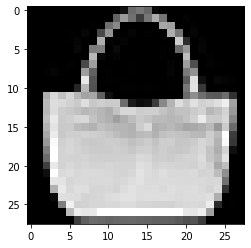

In [ ]:
(feature_train, label_train), (feature_test, label_test) = fashion_mnist.load_data()

print("Train", feature_train.shape, label_train.shape)
print("Test", feature_test.shape, label_test.shape)

plt.imshow(feature_train[100], cmap=plt.get_cmap('gray'))

Feature Engineering

In [ ]:
feature_train = feature_train.reshape((feature_train.shape[0], 28, 28, 1))
feature_test = feature_test.reshape((feature_test.shape[0], 28, 28, 1))

In [ ]:
print("feature_train",feature_train.shape)
print("feature_test",feature_test.shape)

feature_train (60000, 28, 28, 1)
feature_test (10000, 28, 28, 1)


In [ ]:
from tensorflow.keras.utils import to_categorical

label_train = to_categorical(label_train)
label_test = to_categorical(label_test)

# print("label train")
# print(label_train)
# print("\n label test")
# print(label_test)

In [ ]:
feature_train = feature_train.astype('float32')
feature_test = feature_test.astype('float32')

feature_train = feature_train / 255.0
feature_test = feature_test / 255.0

In [ ]:
# feature_train

In [ ]:
# feature_test

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import BatchNormalization

## Multilayer Perceptron (Neural Network)




In [ ]:
model = Sequential()

model.add(Flatten(input_shape=(28, 28, 1)))
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))

opt = SGD(lr=0.01, momentum=0.9)

model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

history = model.fit(feature_train, label_train, batch_size=32, validation_data=(feature_test, label_test), epochs=10)


Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_10 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_34 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_35 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5276 - accuracy: 0.8142 - val_loss: 0.4480 - val_accuracy: 0.8393
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3998 - accuracy: 0.8573 - val_loss: 0.4087 - val_accuracy: 0.8525
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3593 - accu

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.grid(True)

In [ ]:
history_dataframe = pd.DataFrame(history.history)
history_dataframe['epoch'] = history.epoch
history_dataframe

,loss,accuracy,val_loss,val_accuracy,epoch
0,0.527638,0.814183,0.447979,0.8393,0
1,0.399755,0.857267,0.408701,0.8525,1
2,0.359350,0.870567,0.383367,0.8612,2
3,0.335082,0.877617,0.370774,0.8694,3
4,0.317672,0.884700,0.392181,0.8597,4
5,0.304491,0.887567,0.357297,0.8735,5
6,0.291464,0.892667,0.368253,0.8710,6
7,0.282440,0.896067,0.367417,0.8679,7
8,0.273104,0.898900,0.342943,0.8754,8
9,0.265770,0.902400,0.358875,0.8736,9


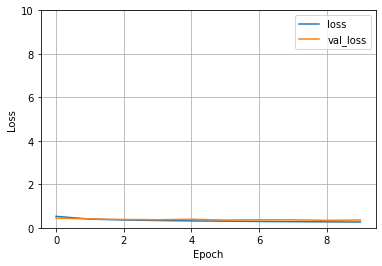

In [ ]:
plot_loss(history)

In [ ]:
loss, accuracy = model.evaluate(feature_test, label_test, verbose=2)

print("Test accuracy:", accuracy)
print("Test loss", loss)

313/313 - 1s - loss: 0.3589 - accuracy: 0.8736
Test accuracy: 0.8736000061035156
Test loss 0.3588749170303345


## Convolutional Neural Network (CNN)

In [ ]:
base_model = Sequential()

base_model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
base_model.add(MaxPooling2D((2, 2)))

base_model.add(Flatten())

base_model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
base_model.add(Dense(10, activation='softmax'))

opt = SGD(lr=0.01, momentum=0.09)

base_model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

base_model.summary()

history_cnn = base_model.fit(feature_train, label_train, batch_size=32, validation_data=(feature_test, label_test), epochs=10)

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_29 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 5408)              0         
_________________________________________________________________
dense_36 (Dense)             (None, 100)               540900    
_________________________________________________________________
dense_37 (Dense)             (None, 10)                1010      
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5318 - accuracy: 0.8146 - val_loss:

In [ ]:
history_cnn_dataframe = pd.DataFrame(history_cnn.history)
history_cnn_dataframe['epoch'] = history_cnn.epoch
history_cnn_dataframe

,loss,accuracy,val_loss,val_accuracy,epoch
0,0.531848,0.814633,0.422524,0.8488,0
1,0.385518,0.864183,0.384310,0.8631,1
2,0.342682,0.879100,0.348289,0.8760,2
3,0.315465,0.887550,0.329265,0.8813,3
4,0.295817,0.893600,0.321516,0.8834,4
5,0.279073,0.900217,0.311226,0.8895,5
6,0.264963,0.904683,0.316392,0.8861,6
7,0.253388,0.909267,0.292070,0.8926,7
8,0.242041,0.912783,0.294677,0.8917,8
9,0.231260,0.916400,0.288429,0.8950,9


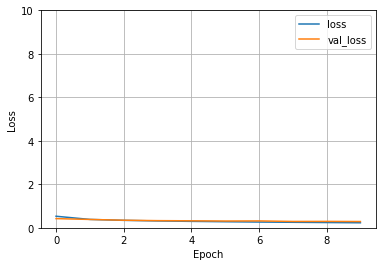

In [ ]:
plot_loss(history_cnn)

In [ ]:
loss, accuracy = base_model.evaluate(feature_test, label_test, verbose=2)

print("Test accuracy:", accuracy)
print("Test loss", loss)

313/313 - 1s - loss: 0.2884 - accuracy: 0.8950
Test accuracy: 0.8949999809265137
Test loss 0.2884294092655182


## Kesimpulan

Arsitektur dengan hasil terbaik didapatkan dari Convolutional Neural Network (CNN) dimana pada iteration/epoch terakhir accuracy CNN lebih besar 1% dan pada validation accuracy lebih besar 2% daripada Neural Network. Hal ini karena layer CNN lebih dalam dan parameternya lebih banyak daripada Neural Network.

# No. 2

## Deeper CNN - Fashion MNIST

In [ ]:
model1 = Sequential()

model1.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model1.add(MaxPooling2D((2, 2)))
model1.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
model1.add(MaxPooling2D((2, 2)))

model1.add(Flatten())

model1.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model1.add(Dense(10, activation='softmax'))

opt = SGD(lr=0.01, momentum=0.09)

model1.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

model1.summary()

history_cnn1 = model1.fit(feature_train, label_train, batch_size=32, validation_data=(feature_test, label_test), epochs=10)

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 1600)              0         
_________________________________________________________________
dense_38 (Dense)             (None, 100)               160100    
_________________________________________________________________
dense_39 (Dense)             (None, 10)              

In [ ]:
loss, accuracy = model1.evaluate(feature_test, label_test, verbose=2)

print("Test accuracy:", accuracy)
print("Test loss", loss)

313/313 - 1s - loss: 0.3214 - accuracy: 0.8863
Test accuracy: 0.8863000273704529
Test loss 0.32140907645225525


In [ ]:
history_cnn1_dataframe = pd.DataFrame(history_cnn1.history)
history_cnn1_dataframe['epoch'] = history_cnn1.epoch
history_cnn1_dataframe

,loss,accuracy,val_loss,val_accuracy,epoch
0,0.596877,0.781267,0.473013,0.8279,0
1,0.415234,0.849967,0.413914,0.8552,1
2,0.366667,0.869217,0.368981,0.8668,2
3,0.336054,0.879283,0.364672,0.8687,3
4,0.315403,0.886467,0.366414,0.8636,4
5,0.297366,0.892000,0.321369,0.8849,5
6,0.283650,0.897300,0.335578,0.8776,6
7,0.271265,0.900950,0.317987,0.8842,7
8,0.261298,0.905533,0.314743,0.8856,8
9,0.252933,0.907283,0.321409,0.8863,9


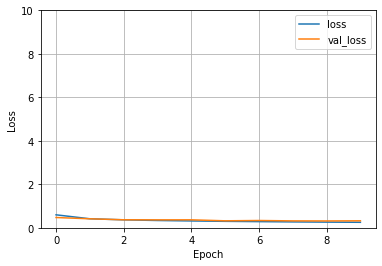

In [ ]:
plot_loss(history_cnn1)

## MNIST

Train (60000, 28, 28) (60000,)
Test (10000, 28, 28) (10000,)


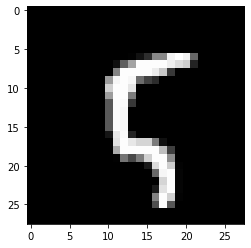

In [ ]:
from tensorflow.keras.datasets import mnist

(feature_train, label_train), (feature_test, label_test) = mnist.load_data()

print("Train", feature_train.shape, label_train.shape)
print("Test", feature_test.shape, label_test.shape)

plt.imshow(feature_train[100], cmap=plt.get_cmap('gray'))

## Feature Engineering

In [ ]:
feature_train = feature_train.reshape((feature_train.shape[0], 28, 28, 1))
feature_test = feature_test.reshape((feature_test.shape[0], 28, 28, 1))

In [ ]:
from tensorflow.keras.utils import to_categorical

label_train = to_categorical(label_train)
label_test = to_categorical(label_test)

# print(label_train)

In [ ]:
feature_train = feature_train.astype('float32')
feature_test = feature_test.astype('float32')

feature_train = feature_train / 255.0
feature_test = feature_test / 255.0

In [ ]:
# feature_train

## Deeper CNN - MNIST

In [ ]:
model2 = Sequential()

model2.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model2.add(MaxPooling2D((2, 2)))
model2.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
model2.add(MaxPooling2D((2, 2)))

model2.add(Flatten())

model2.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model2.add(Dense(10, activation='softmax'))

opt = SGD(lr=0.01, momentum=0.09)

model2.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

model2.summary()

history_cnn2 = model2.fit(feature_train, label_train, batch_size=32, validation_data=(feature_test, label_test), epochs=10)

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 1600)              0         
_________________________________________________________________
dense_40 (Dense)             (None, 100)               160100    
_________________________________________________________________
dense_41 (Dense)             (None, 10)              

In [ ]:
loss, accuracy = model2.evaluate(feature_test,  label_test, verbose=2)

print("Test accuracy:", accuracy)
print("Test loss:", loss)

313/313 - 1s - loss: 0.0411 - accuracy: 0.9870
Test accuracy: 0.9869999885559082
Test loss: 0.04109107330441475


In [ ]:
history_cnn2_dataframe = pd.DataFrame(history_cnn2.history)
history_cnn2_dataframe['epoch'] = history_cnn2.epoch
history_cnn2_dataframe

,loss,accuracy,val_loss,val_accuracy,epoch
0,0.227941,0.932417,0.089248,0.9730,0
1,0.085059,0.974033,0.064269,0.9798,1
2,0.063140,0.980567,0.052907,0.9834,2
3,0.051899,0.983833,0.055735,0.9811,3
4,0.044344,0.986883,0.037445,0.9876,4
5,0.038912,0.987933,0.049671,0.9834,5
6,0.034628,0.989367,0.037139,0.9880,6
7,0.030482,0.990533,0.034284,0.9884,7
8,0.028046,0.991400,0.033586,0.9884,8
9,0.025745,0.992267,0.041091,0.9870,9


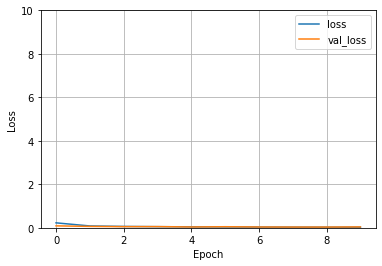

In [ ]:
plot_loss(history_cnn2)

## Kesimpulan

Berdasarkan data training dari MNIST dan Fashion MNIST dengan metode deeper CNN, hasil accuracy antara keduanya memiliki perbedaan yang jelas dimana MNIST accuracy nya lebih besar 9% dan validation accuracy lebih besar 10%. Hal ini disebabkan oleh perbedaan struktur data pada Fashion MNIST dan MNIST, dimana pixel pada Fashion MNIST lebih complex.